In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        continue

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Content
!ls /kaggle/input/landmark-retrieval-2020/
!ls /kaggle/input/landmark-retrieval-2020/train
!ls /kaggle/input/landmark-retrieval-2020/test
!ls /kaggle/input/landmark-retrieval-2020/index
print('')

# Size of data
#!du -hs /kaggle/input/landmark-retrieval-2020/train/  # 101 GB
#!du -hs /kaggle/input/landmark-retrieval-2020/test/   # 0.07 GB
#!du -hs /kaggle/input/landmark-retrieval-2020/index/  # 4.9 GB

index  test  train  train.csv
0  1  2  3  4  5  6  7	8  9  a  b  c  d  e  f
0  1  2  3  4  5  6  7	8  9  a  b  c  d  e  f
0  1  2  3  4  5  6  7	8  9  a  b  c  d  e  f



## File structure
    
Three folders with images are available:    
- `train`  
- `test`  
- `index`  

Landmark labels are placed in `train.csv`  

Each image has a unique **id** and is placed within **3** subfolders according to the first **3** characters of the image id:  
    For example, `abcdef.jpg` is placed in `a/b/c/abcdef.jpg`.

In [3]:
from pathlib import Path

data_path = Path('/kaggle/input/landmark-retrieval-2020/')
train_path = data_path / 'train'
test_path = data_path / 'test'
index_path = data_path / 'index'

print('training_path =', train_path)
print('test_path     =', test_path)
print('index_path    =', index_path)

training_path = /kaggle/input/landmark-retrieval-2020/train
test_path     = /kaggle/input/landmark-retrieval-2020/test
index_path    = /kaggle/input/landmark-retrieval-2020/index


In [4]:
import glob
train_list = glob.glob('../input/landmark-retrieval-2020/train/*/*/*/*')
test_list = glob.glob('../input/landmark-retrieval-2020/test/*/*/*/*')
index_list = glob.glob('../input/landmark-retrieval-2020/index/*/*/*/*')
print( 'train_images :', len(train_list))
print( 'test_images  :', len(test_list))
print( 'index_images :', len(index_list))


train_images : 1580470
test_images  : 1129
index_images : 76176


## Explore train data. CSV

In [5]:
train = pd.read_csv('../input/landmark-retrieval-2020/train.csv')
train.head()

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7


In [6]:
train.shape

(1580470, 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd88eb9b350>]],
      dtype=object)

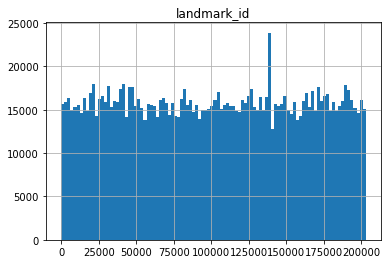

In [7]:
train.hist(bins=100)

## Plot landmark labels

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

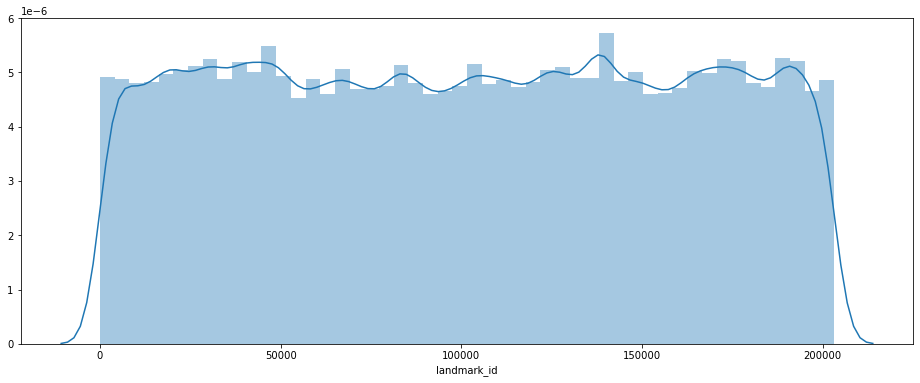

In [9]:
fig, axs = plt.subplots(figsize=(16,6))

ax = sns.distplot(train['landmark_id'])

plt.savefig('landmark_id.png', dpi=100)

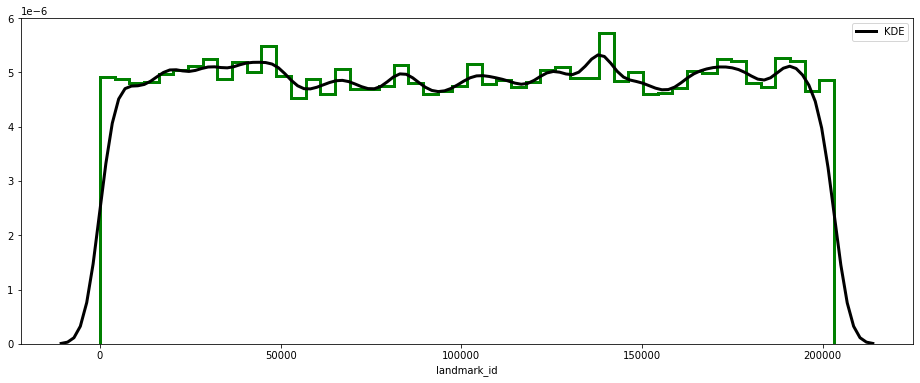

In [10]:
fig, axs = plt.subplots(figsize=(16,6))

ax = sns.distplot(train['landmark_id'], 
                  rug=False, 
                  #rug_kws={"color": "g"}, 
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"}, 
                  hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "g"})

plt.savefig('landmark_id_2.png', dpi=100)

In [11]:
train['landmark_id'].value_counts()

138982    6272
126637    2231
20409     1758
83144     1741
113209    1135
          ... 
180503       2
179834       2
183115       2
63266        2
197219       2
Name: landmark_id, Length: 81313, dtype: int64

In [12]:
#train['landmark_id'].value_counts().plot(kind="bar")

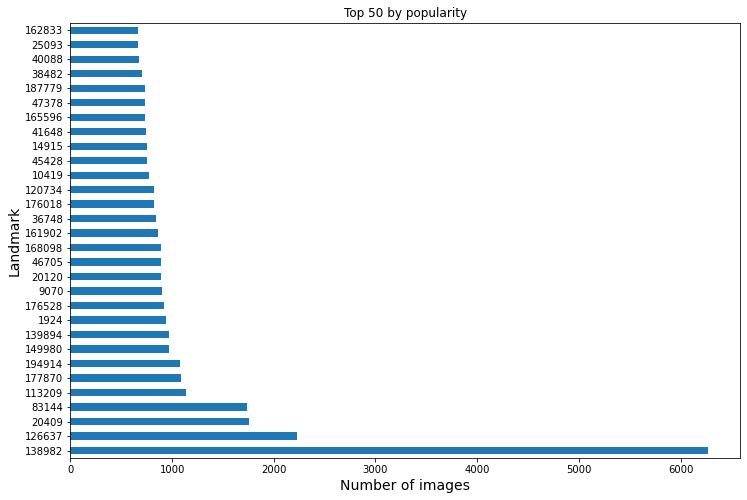

In [13]:
## Top 20 by popularity within dataset

fig, axs = plt.subplots(figsize=(12,8))

train['landmark_id'].value_counts(sort=True, ascending=False)[:30].plot(kind='barh')

plt.title('Top 50 by popularity')
plt.xlabel('Number of images', fontsize=14)
plt.ylabel('Landmark', fontsize=14)

plt.savefig('landmark_id_top30.png', dpi=100)

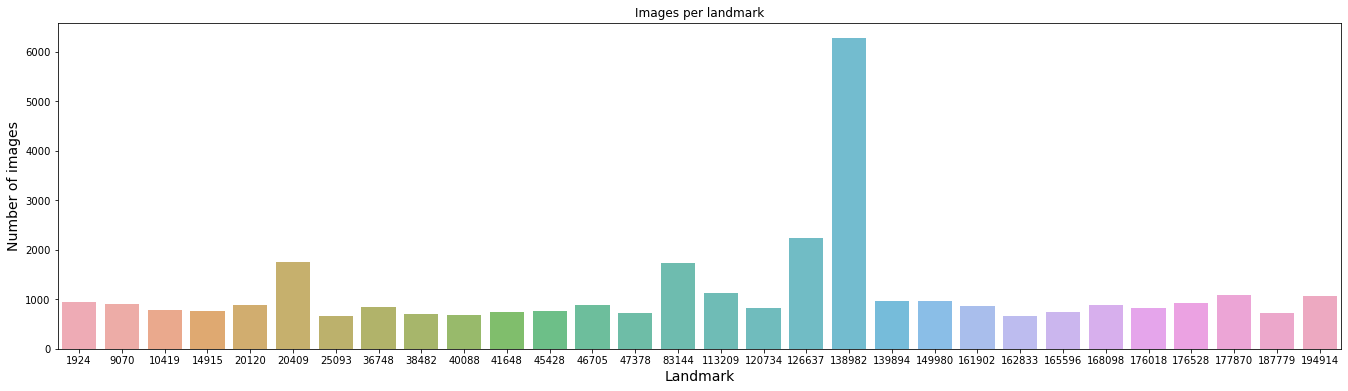

In [14]:
image_count  = train['landmark_id'].value_counts(sort=True, ascending=False)
image_count = image_count[:30,]

plt.figure(figsize=(23,6))

sns.barplot(image_count.index, image_count.values, alpha=0.8)

plt.title('Images per landmark')
plt.ylabel('Number of images', fontsize=14)
plt.xlabel('Landmark', fontsize=14)

plt.savefig('landmark_id_top30_vs_images.png', dpi=100)

plt.show()

In [15]:
image_count_all  = train['landmark_id'].value_counts(sort=True, ascending=False)

print('landmark_id:')

print(image_count_all)

print()
print ('Max images for a given landmark_id: {}'.format(image_count_all.max()))
print ('Min images for a given landmark_id: {}'.format(image_count_all.min()))

print()
print('Number of unique landmark IDs: {}'.format(len(image_count_all))) # len(image_count_all.index.values)

landmark_id:
138982    6272
126637    2231
20409     1758
83144     1741
113209    1135
          ... 
180503       2
179834       2
183115       2
63266        2
197219       2
Name: landmark_id, Length: 81313, dtype: int64

Max images for a given landmark_id: 6272
Min images for a given landmark_id: 2

Number of unique landmark IDs: 81313


### Landmarks 
- Maximum number of images=6272 (landmark_id='138982')
- Minimum number of images=2 (landmark_id='197219')
    - Totally 4750 are with 2 images only

In [16]:
df_image_count_all = pd.DataFrame(image_count_all.reset_index().values, columns=['landmark_id', 'Number' ])
df_image_count_all_ind = df_image_count_all.sort_index(axis = 0, ascending=True)
df_image_count_all_ind

,landmark_id,Number
0,138982,6272
1,126637,2231
2,20409,1758
3,83144,1741
4,113209,1135
...,...,...
81308,180503,2
81309,179834,2
81310,183115,2
81311,63266,2


- 4750 are with 2 images only

In [17]:
df_image_count_all[df_image_count_all['Number']<3].count()

landmark_id    4750
Number         4750
dtype: int64

- 44646 are with 10 or less images only, almost 50% of total landmarks

In [18]:
df_image_count_all[df_image_count_all['Number']<11].count()

landmark_id    44646
Number         44646
dtype: int64

- 81306 are with 1000 or less images only (out of 81313)

In [19]:
df_image_count_all[df_image_count_all['Number']<1001].count()

landmark_id    81306
Number         81306
dtype: int64

- 81306 are with 1000 or less images only (out of 81313), only 7 with >1000 images

In [20]:
df_image_count_all[df_image_count_all['Number']>1001].count()

landmark_id    7
Number         7
dtype: int64

### Plot distributions

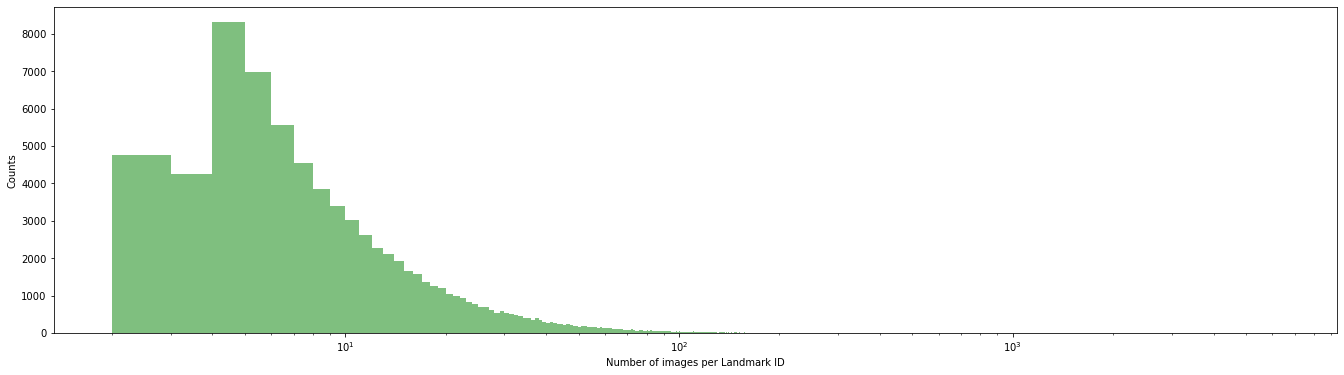

In [21]:
num_list = list(df_image_count_all['Number'])

fig, axs = plt.subplots(figsize=(23,6))
plt.hist(num_list, density=False, bins=6272, color='green', alpha=0.5)  

axs.set_xscale('log')

plt.ylabel('Counts') # Probability if scaled
plt.xlabel('Number of images per Landmark ID')

plt.savefig('images_per_landmark_id.png', dpi=100)

plt.show()

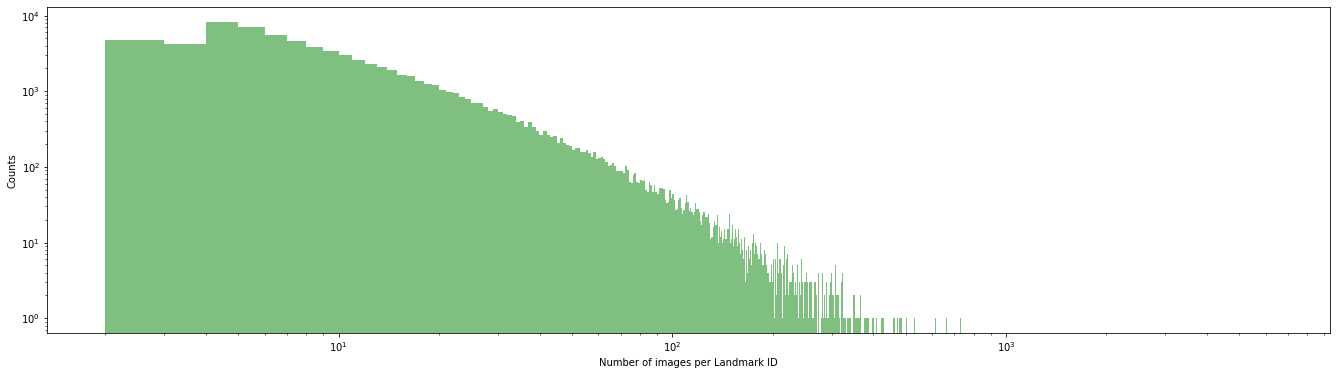

In [22]:
num_list = list(df_image_count_all['Number'])

fig, axs = plt.subplots(figsize=(23,6))
plt.hist(num_list, density=False, bins=6272, color='green', alpha=0.5)  

axs.set_xscale('log')
axs.set_yscale('log')

plt.ylabel('Counts') # Probability if scaled
plt.xlabel('Number of images per Landmark ID')

plt.savefig('images_per_landmark_id_2.png', dpi=100)

plt.show()

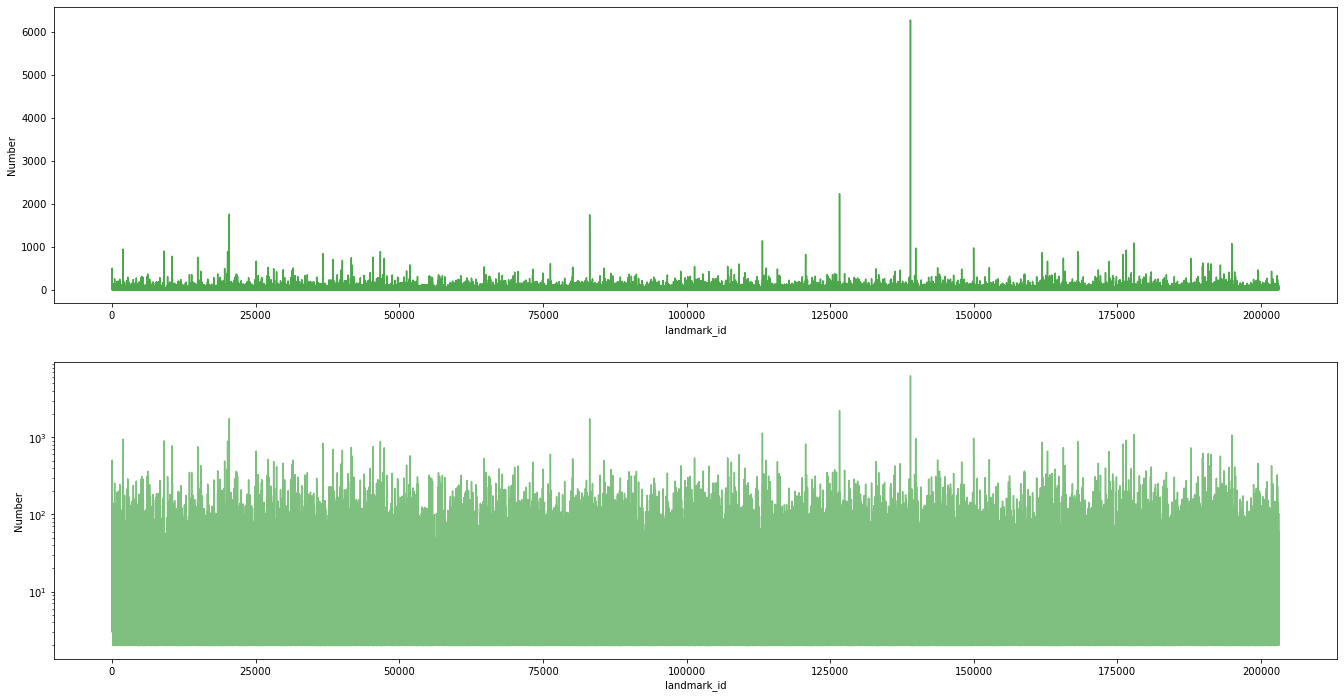

In [23]:
#plt.figure(figsize=(23,6))

fig, axs = plt.subplots(2,1, figsize=(23,12))

# Normal version
sns.lineplot(x=df_image_count_all_ind['landmark_id'], y=df_image_count_all_ind['Number'], data=df_image_count_all_ind, color='green', alpha=0.7, ax=axs[0])
# Log version
plott = sns.lineplot(x=df_image_count_all_ind['landmark_id'], y=df_image_count_all_ind['Number'], data=df_image_count_all_ind, color='green', alpha=0.5, ax=axs[1])
plott.set(yscale="log")

plt.savefig('landmark_id_distribution_nonlog_log.png', dpi=100)

plt.show()

## Plot images

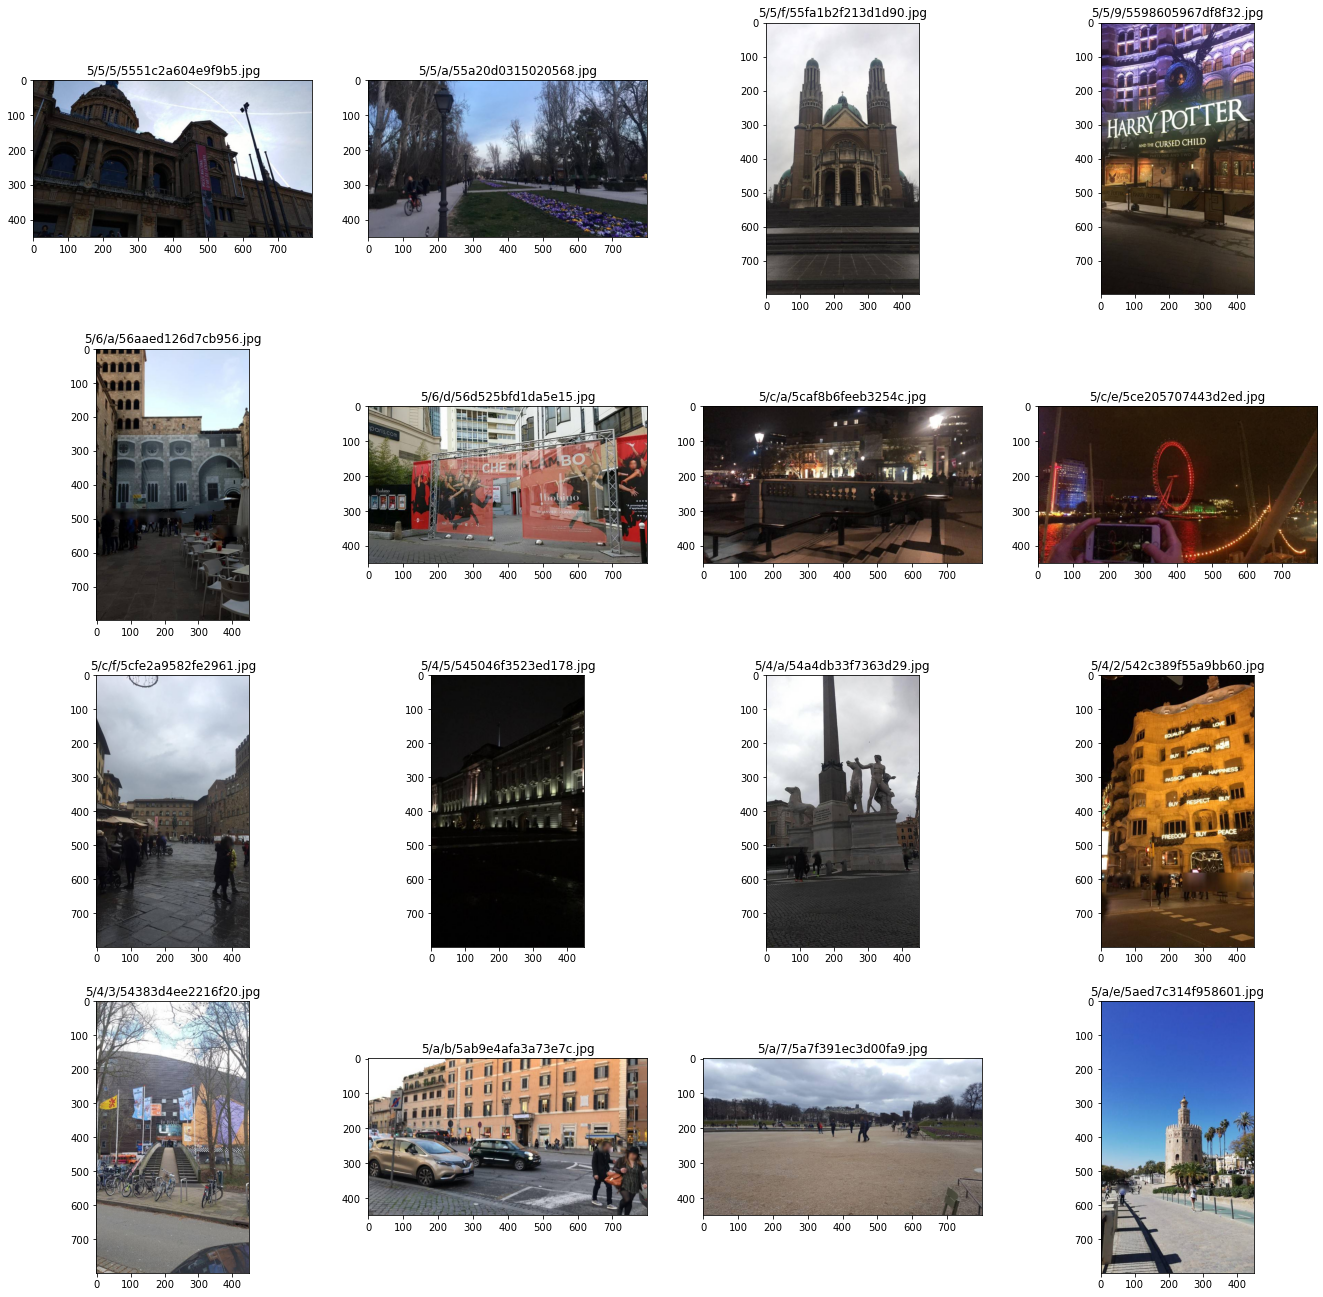

In [24]:
import cv2

plt.rcParams["axes.grid"] = False
fig, axs = plt.subplots(4, 4, figsize=(23, 23))

curr_row = 0

for i in range(0,16):
    example = cv2.imread(test_list[i])
    example = example[:,:,::-1]
    
    col = i%4
    
    ## Add title information
    axs[i//4, i%4].set_title('{}/{}/{}/{}'.format(
        test_list[i].split('/')[-4],
        test_list[i].split('/')[-3],
        test_list[i].split('/')[-2],
        test_list[i].split('/')[-1]))
    
    ## Plot n x m images
    axs[col, curr_row].imshow(example)
    
    if col == 3:
        curr_row += 1
    
plt.savefig('some_data_images.png', dpi=100)

plt.show()